# Prediction Using Decision Tree Classifier

Problem Statement: Create a decision tree model for the Iris dataset and visualize it inorder to accurately classify new data into the appropriate classes.

Done By: Shreya A

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [2]:
#Reading in the dataset into a pandas dataframe and viewing the first 5 entries

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Get an overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
#Printing general descriptive statistics for the data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Checking how many records are in each class to know if the data is balanced

df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

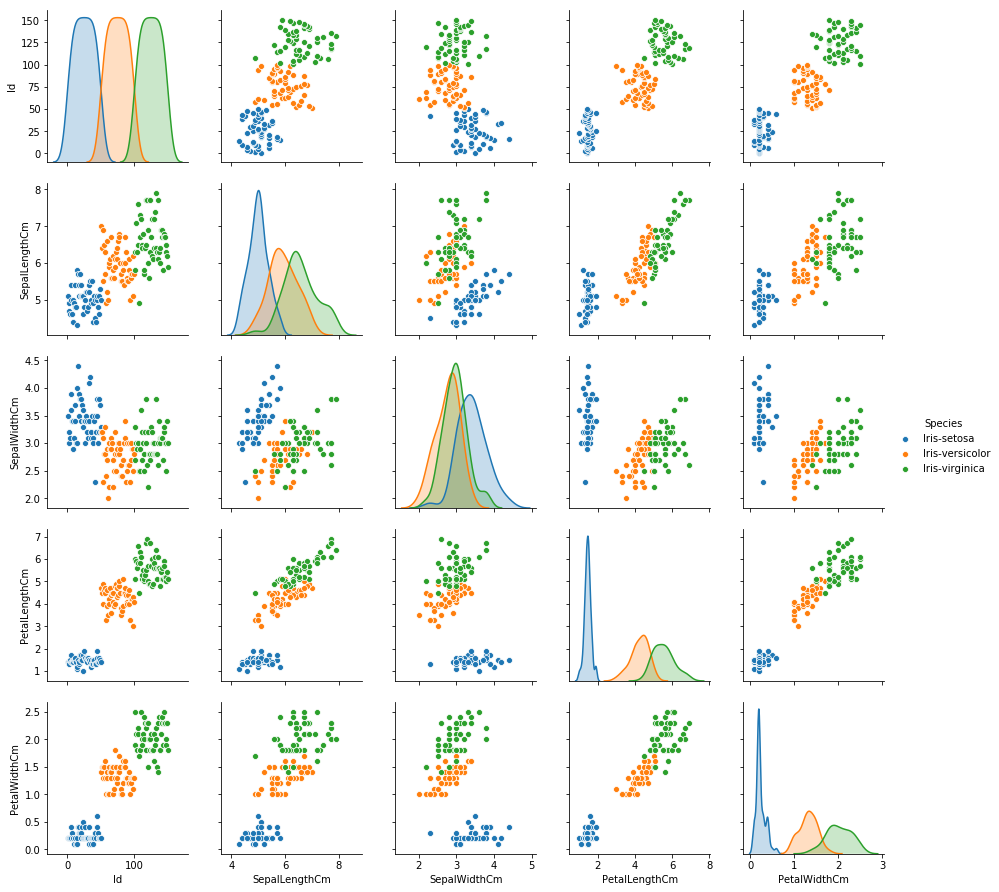

In [6]:
#Visualizing the relationship between variables according to our target variable, Species

sns.pairplot(df, hue='Species')

# Model Building

In [7]:
#Separating the dataset into dependent and independent variables

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [8]:
#Splitting the data into train and test using a 80:20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    test_size=0.2, random_state=100)

In [9]:
#Confirming that the split has worked

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [10]:
#Instantiate the Decision Tree Classifier

dt = DecisionTreeClassifier()

In [11]:
#Fit the model

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualize the Decision Tree

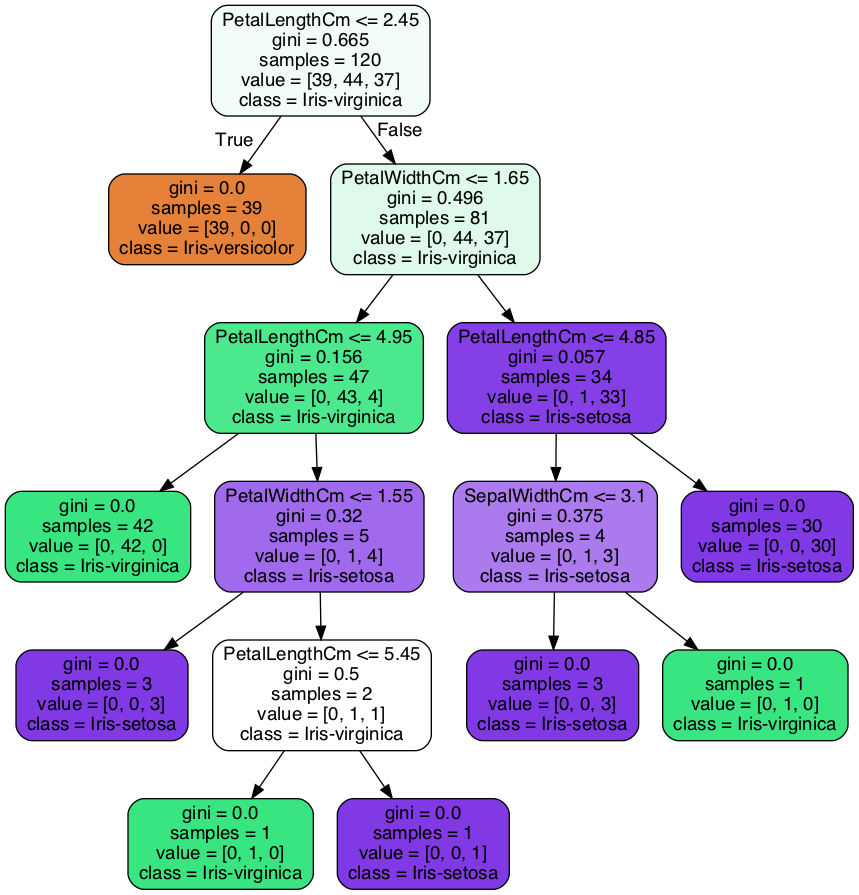

In [12]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names = X.columns,
               class_names = ['Iris-versicolor','Iris-virginica','Iris-setosa'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Evaluate Model Performance

In [14]:
#Printing the Classification Report to evaluate performance of the model

y_pred = dt.predict(X_test)

print ('The Classification Report\n')
print(classification_report(y_test, y_pred))

The Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



Based on the above metrics, the model has a 97% accuracy and the decision tree is now ready to make predictions for any new data.